# Python for Business Analytics - Data visualisation
(http://www.marcelscharth.com/python/visualisation.html)

## Data

For now, our activities will be based on the tips dataset provided by the seaborn data visualisation package. The data tips given by the customers of a restaurant, along with variables such as the total bill value, the gender of the waitea, and the day of the week. We start by loading the data and displaying the first five rows.

In [ ]:
from google.colab import drive
drive.mount('/Data')
%cd /Data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /Data
/Data


In [ ]:
import pandas as pd
data=pd.read_csv('/Data/My Drive/Data/tips.csv')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


It is good practice to start by computing some basic descriptive statistics and verifying that there are no missing values for any variables. Plotting tools generally return errors if the data provided contains missing values.

In [ ]:
len(data)

244

In [ ]:
data.describe().round(2)

,total_bill,tip,size
count,244.00,244.00,244.00
mean,19.79,3.00,2.57
std,8.90,1.38,0.95
min,3.07,1.00,1.00
25%,13.35,2.00,2.00
50%,17.80,2.90,2.00
75%,24.13,3.56,3.00
max,50.81,10.00,6.00


## Plotting basics

The main plotting library in Python is [Matplotlib](http://matplotlib.org/). All other data visualisation libraries which we are going to use are based on Matplotlib. We load the library as follows.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline



The %matplotlib inline option means that the figures will display on the notebook, rather on a separate window.

It is helpful to distiguish between two approaches for creating data visualisations in Python: we can either use [high level](https://en.wikipedia.org/wiki/High-_and_low-level) functions to generate figures, which is the simplest way, or use commands that allow for greater customisation, at the cost of more complex syntax. We will study both, starting with the simplest option.

In terms of high level functions, we have three options for the common plots in statistics: matplotlib, seaborn and pandas. Suppose that we want to create a scatter plot to visualise the relationship betwen the size of the tip and the total bill. The basic matplotlib command is the plt.scatter function. In addition, you always need to add plt.show() to display the figure.


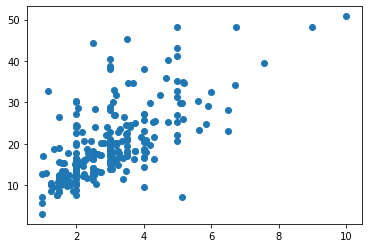

In [ ]:
plt.scatter(data['tip'], data['total_bill'])
plt.show()

The default matplotlib aesthetic is very basic. To create more compelling figures, we turn to the [seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html) package. The seaborn is a statistical data visualisation package that brings two features: it changes the default figure appearance and offers a high level interface for a range of common statistical plots.

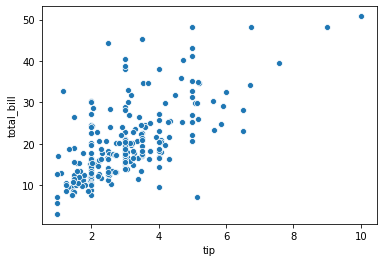

In [ ]:
import seaborn as sns
sns.scatterplot(data['tip'], data['total_bill'])

The seaborn option for the scatter plot is the following.

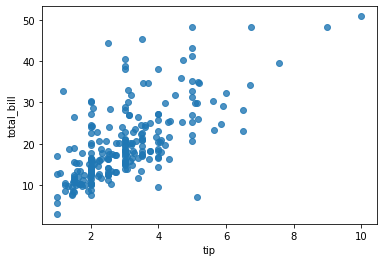

In [ ]:
sns.regplot(x='tip', y='total_bill', data=data, fit_reg=False)
#sns.show() # plt.show() also works, but sns.plt.show() is good practice


In addition to the better figure appearance, there are two advantages in using the seaborn function: it offers more options and than the basic matplotlib function and integrates. To illustrate this, I add a fitted regression line to the plot (which is the main purpose of the function). Re the [function reference](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html) for the full range of options.

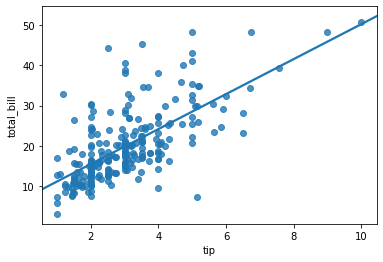

In [ ]:
sns.regplot(x='tip', y='total_bill', data=data, ci=None)

A third option is to use pandas to generate the scatter plot.

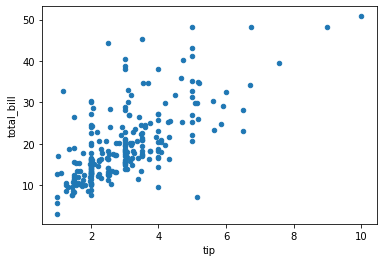

In [ ]:
data.plot(kind='scatter', x='tip', y='total_bill')
#plt.show()



The pandas option is particularly useful for time series plots because it automatically labels the ticks the time axis in good way when the x variable is a date representation.

Another very common statistical plot is the histogram. Again, we have matplotlib, seaborn and pandas high-level functions to do it. Below I present the first two options.


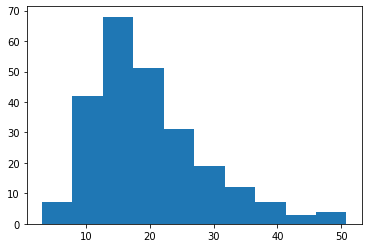

In [ ]:
plt.hist(data['total_bill'])
plt.show()

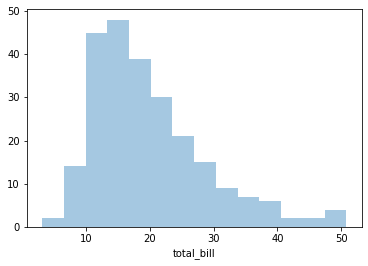

In [ ]:
sns.distplot(data['total_bill'], kde=None)

As before, the seaborn function has many more options. For example, we can add a tick for each observation as the . You should also experiment with setting kde to True (which is the default).

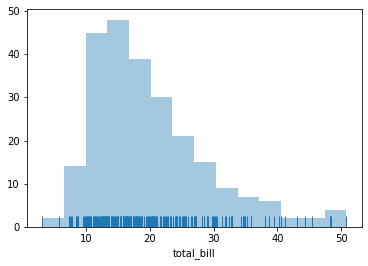

In [ ]:
sns.distplot(data['total_bill'], kde=False, rug=True)

## Seaborn

Seaborn also offers easy ways to control the figure aesthetics. For example, I often prefer to create figures with a white background as below. Refer to the documentation for [general options](https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html) and available [color palettes](https://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html).

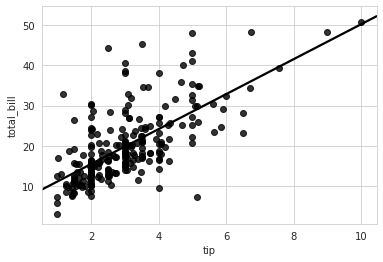

In [ ]:
sns.set_style('whitegrid')
sns.regplot(x='tip', y='total_bill', data=data, ci=None, color='black')

Let us now look at some useful plots. When conducting exploratory data analysis, we often want to visualise how a categorical variable affects a numerical variable of interest. A common way to do this is through categorical box plots.

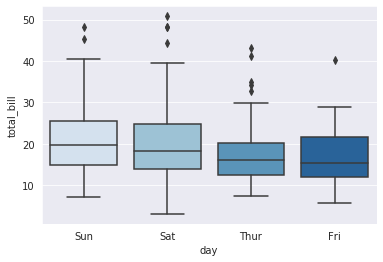

In [ ]:
sns.set_style('darkgrid')
sns.boxplot(x='day', y='total_bill', data=data, palette='Blues')

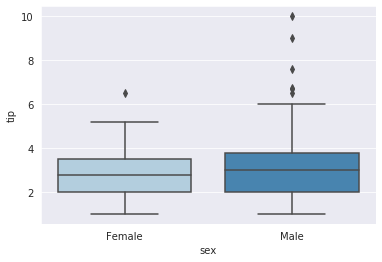

In [ ]:
sns.boxplot(x='sex', y='tip', data=data, palette='Blues')

Seaborn also offers other types of plots such as a swarm plot, which allows to see the distribution of values for each category by avoiding overlapping points.

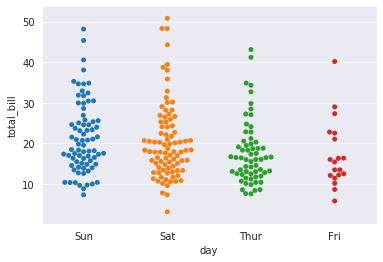

In [ ]:
sns.swarmplot(x='day', y='total_bill', data=data)

In several seaborn functions we can specify a hue option, which colour codes points according to a categorical variable.

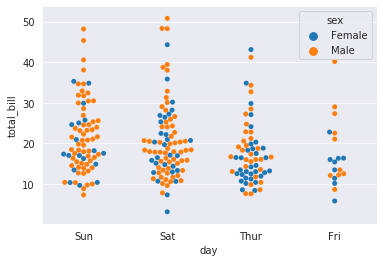

In [ ]:
sns.swarmplot(x='day', y='total_bill', data=data, hue='sex')

Back to numerical variables, here are two more examples.

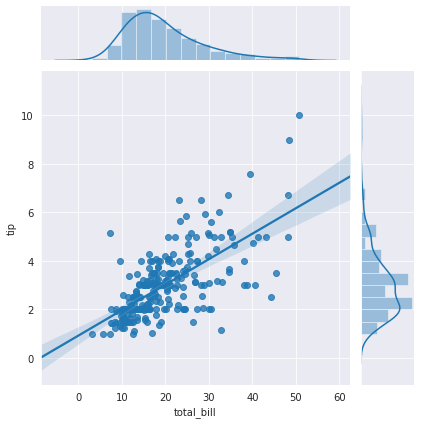

In [ ]:
sns.jointplot("total_bill", "tip", data=data, kind="reg", annot_kws=dict(stat="r"))

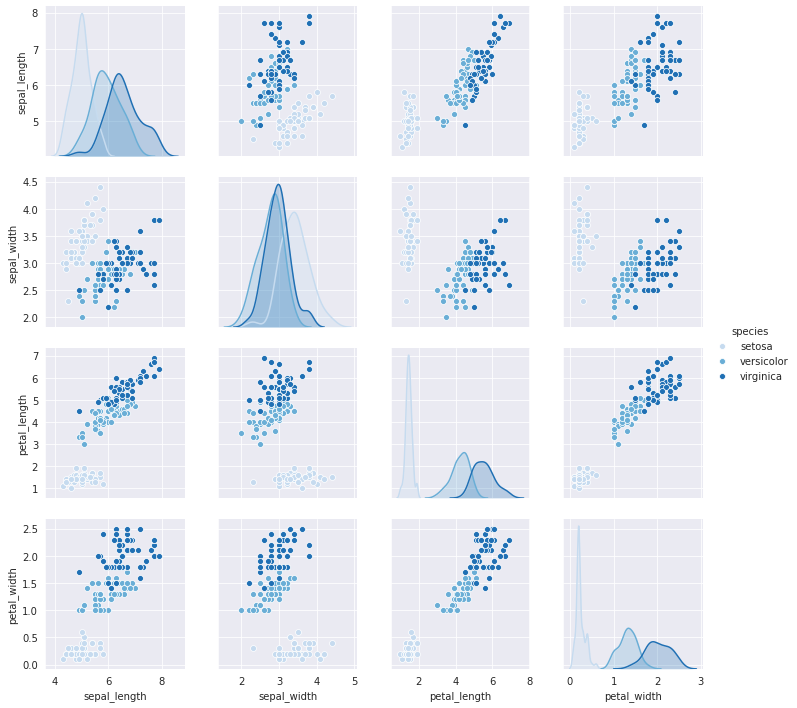

In [ ]:
df = sns.load_dataset('iris') # temporarily using a different dataset for this one
sns.pairplot(df, palette='Blues', hue='species')

## Customisation

The high level functions allow for some degree of customisation. Here is an example.

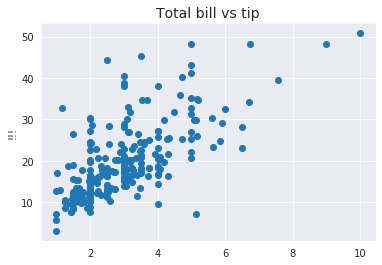

In [ ]:
plt.scatter(data['tip'], data['total_bill'])
plt.title('Total bill vs tip', fontdict={'fontsize': 14})
plt.ylabel('!!!')
plt.show()

However, as we move into more advanced usage, it is better to follow a more abstract and Pythonic approach. Below I give you a template to get started; this is explained in the detail in the face-to-face session.

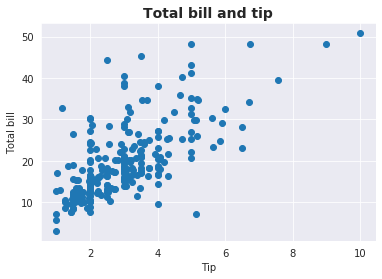

In [ ]:
fig, ax= plt.subplots()
ax.scatter(data['tip'], data['total_bill'], color='#1F77B4')
ax.set_title('Total bill and tip', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Total bill')
ax.set_xlabel('Tip')
plt.show()



As an analogy, if we think about a painting in a museum, the fig object is the whole painting, including the frame, and ax is the canvas. fig, ax= plt.subplots() therefore creates a figure object and an empty canvas for your to build on.

We can for example, do multiple plots in the same figure. The next cell manually creates a scatter plot that is colour-coded by sex.


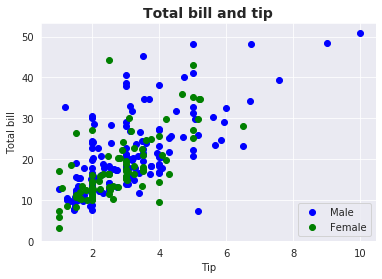

In [ ]:
fig, ax= plt.subplots()
ax.scatter(data[data['sex']=='Male']['tip'], data[data['sex']=='Male']['total_bill'], color='blue', label='Male')
ax.scatter(data[data['sex']=='Female']['tip'], data[data['sex']=='Female']['total_bill'], color='green', label='Female')
ax.set_title('Total bill and tip', fontdict={'fontsize': 14, 'fontweight': 'bold'})
ax.set_ylabel('Total bill')
ax.set_xlabel('Tip')
ax.legend()
plt.show()

To save time in customising the figure, we can use the set method of axis objects.

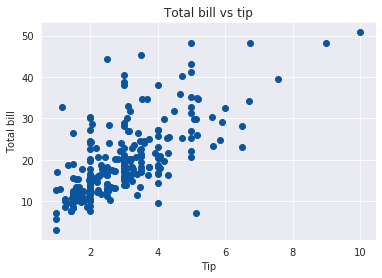

In [ ]:
fig, ax= plt.subplots()
ax.scatter(data['tip'], data['total_bill'], color=sns.color_palette('Blues')[-1])
ax.set(title='Total bill vs tip', ylabel='Total bill', xlabel='Tip')
plt.show()

An esssential customisation is to determine the size of the figure.

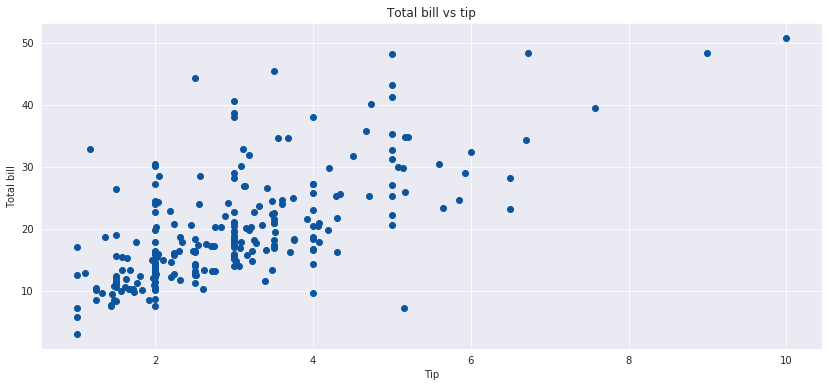

In [ ]:
fig, ax= plt.subplots(figsize=(14,6))
ax.scatter(data['tip'], data['total_bill'], color=sns.color_palette('Blues')[-1])
ax.set(title='Total bill vs tip', ylabel='Total bill', xlabel='Tip')
plt.show()

## Saving figures

Importantly, we need to be able to save our pictures to disk so that we can later insert them into reports. This is easy once we have a figure object.

In [ ]:
fig.savefig('/Data/My Drive/Data/tips.png', format='png', dpi=250)

## Multiple plots in one figure

To have multiple plots in one figure, we create an array of axes. The next example puts together a lot of what we did so far.

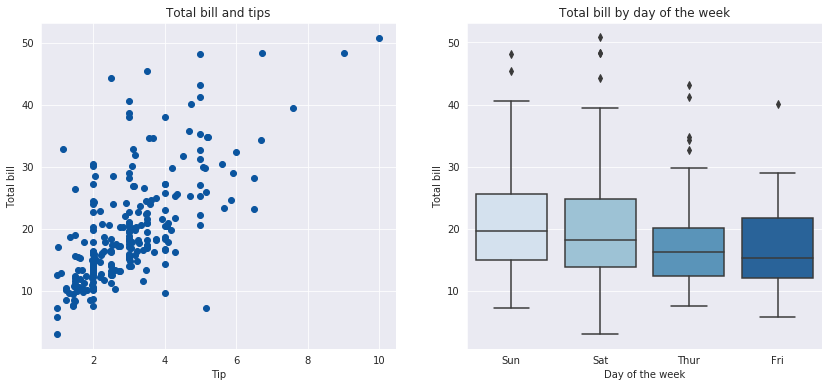

In [ ]:
fig, ax= plt.subplots(1,2, figsize=(14,6))
ax[0].scatter(data['tip'], data['total_bill'], color=sns.color_palette('Blues')[-1])
ax[0].set(title='Total bill and tips', ylabel='Total bill', xlabel='Tip')
sns.boxplot(x='day', y='total_bill', data=data, palette='Blues', ax=ax[1])
ax[1].set(title='Total bill by day of the week', ylabel='Total bill', xlabel='Day of the week')
plt.show()

## Practice

### Exercise 1

Consider again the [airline sentiment dataset](http://www.marcelscharth.com/python/Tweets.csv).

(a) Use the pandas [crosstab](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.crosstab.html) function to tabulate the sentiment counts for for each airline. It is better to then convert the table to proportions by airline.

(b) Create a bar chart for the above table using a high level function, for example the seaborn [barplot](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.barplot.html) or the pandas option.

(c) Create the same type of figure again, but now customise it figure according your taste: change the colours (for example, I like the [tableau colour scheme](http://tableaufriction.blogspot.com.au/2012/11/finally-you-can-use-tableau-data-colors.html)), give it a title, etc.

(d) Save the figure and open it elsewhere to check that it worked.

### Exercise 2 (challenging)

This exercise is based on data from the [Airbnb user pathways challenge](http://databits.io/challenges/airbnb-user-pathways-challenge), in which Airbnb invited data scientists to create visualisations that would help them understand the trends in their data. The [winning submission](http://databits.io/submission/airbnb-user-pathways) is an excellent illustration of how elaborate visualisation can be.

Your task in this exercise is to try to replicate the four figures in the main page of the challenge website. Display the plots together in a single 2x2 figure once you sucessfully create the plots individually. For convenience, here are links to the [data](http://www.marcelscharth.com/python/airbnb_session_data.txt) and [variable descriptions](http://www.marcelscharth.com/python/data_dictionary.rtf). Handling the data is non-trivial, so that this is also a pandas exercise. As additional practice, try to replicate the basic summary that they provide on the webpage above. You should open the data in a text editor first to see what it looks like. You will need to use the pandas [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) function.